<a href="https://colab.research.google.com/github/ntalme/Proyecto-Aprendizaje-de-Maquina/blob/main/CodigoProyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DATOS**

### **CARGAR ARCHIIVO**

In [9]:
# Inicializamos listas para guardar los datos
corpus = []       # Diagnósticos y procedimientos
target = []       # GRD
edad = []         # Edad del paciente
sexo = []         # Sexo (0: Hombre, 1: Mujer)

# Abrimos el archivo CSV
archivo = open("dataset_elpino.csv", encoding="utf-8")

# Leemos la primera línea (encabezados de columna)
header = archivo.readline().strip().split(";")

In [10]:
# Limpiamos los nombres de columnas
features = []
for col in header:
    col = col.split("-")[0].strip()  # Se elimina todo lo que esté después de "-"
    if col.startswith("Diag") or col.startswith("Proc"):
        col = col.split(" ")
        col = col[0] + col[1]  # Se junta nombre ej: "Diag" + "01"  = "Diag01"
    features.append(col)

# Recorremos las filas
for linea in archivo:
    row = []
    linea = linea.strip().split(";")

    for i in range(len(linea)):
        col = linea[i].split("-")[0].strip()

        if i == 67:  # Columna del GRD
            target.append(col)
        elif i == 66:  # Sexo (lo pasamos a binario)
            sexo.append(1 if col == "Mujer" else 0)
        elif i == 65:  # Edad
            edad.append(int(col))
        else:
            row.append(col)  # Diags y procs van a la lista corpus

    corpus.append(row)

# Cerramos el archivo
archivo.close()

### **DATOS LIMPIOS**

In [11]:
#Libreria
import pandas as pd

# Creamos el DataFrame con los datos procesados
df = pd.DataFrame(corpus, columns=features[:-3])  # Sin edad, sexo, GRD
df["Edad"] = edad
df["Sexo"] = sexo
df["GRD"] = target

# Revisamos las primeras filas
df.head()

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced24,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,Edad,Sexo,GRD
0,A41.8,B37.6,I39.8,N10,B96.1,L89.9,L08.9,B96.2,A41.5,J86.9,...,99.84,88.72,90.42,90.52,91.39,91.33,87.03,40,0,184103
1,U07.1,J12.8,R06.0,R05,R50.9,Z29.0,Z01.7,J96.00,J94.2,J92.9,...,91.62,90.43,91.39,90.52,91.32,96.59,90.99,53,0,041013
2,K56.5,R57.2,R57.1,J80,Y95,J15.0,U82.2,B95.6,B96.8,B37.1,...,99.84,91.73,90.53,99.26,89.39,89.66,89.65,65,0,041013
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,...,57.94,00.13,00.17,99.04,99.18,99.21,99.23,61,0,041023
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,...,90.52,91.39,91.32,93.90,99.15,96.59,45.13,30,0,041023


## **INFORMACIÓN DE LOS DATOS**

In [12]:
# Para ver la información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14561 entries, 0 to 14560
Data columns (total 68 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Diag01    14561 non-null  object
 1   Diag02    14561 non-null  object
 2   Diag03    14561 non-null  object
 3   Diag04    14561 non-null  object
 4   Diag05    14561 non-null  object
 5   Diag06    14561 non-null  object
 6   Diag07    14561 non-null  object
 7   Diag08    14561 non-null  object
 8   Diag09    14561 non-null  object
 9   Diag10    14561 non-null  object
 10  Diag11    14561 non-null  object
 11  Diag12    14561 non-null  object
 12  Diag13    14561 non-null  object
 13  Diag14    14561 non-null  object
 14  Diag15    14561 non-null  object
 15  Diag16    14561 non-null  object
 16  Diag17    14561 non-null  object
 17  Diag18    14561 non-null  object
 18  Diag19    14561 non-null  object
 19  Diag20    14561 non-null  object
 20  Diag21    14561 non-null  object
 21  Diag22    14

In [13]:
# Ver la cantidad total de valores nulos que hay en los datos
df.isnull().sum().sum()

np.int64(0)

In [14]:
# Ver la cantidad total de celdas vacias
(df == '').sum().sum()

np.int64(649545)

### **BLOXPLOT**

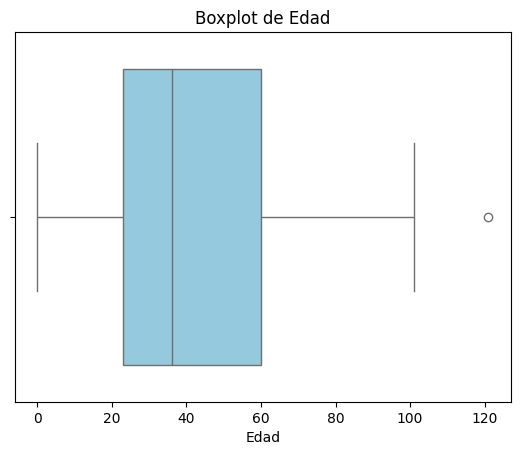

In [16]:
# Librerias
import matplotlib.pyplot as plt
import seaborn as sns

# Grafico Bloxplot
sns.boxplot(data=df, x="Edad", color="skyblue")
plt.title("Boxplot de Edad")
plt.show()


### **DISTRIBUCIÓN DE LA EDAD**

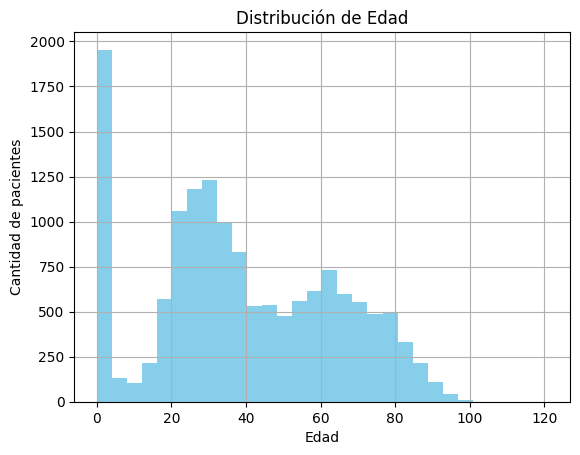

In [17]:
# Histograma para ver la distribución completa de las edades
df["Edad"].hist(bins=30, color="skyblue", edgecolor='none')
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad de pacientes")
plt.show()

### **CANTIDAD DE HOMBRES Y MUJERES**

In [18]:
# Cantidad de hombres (0) y mujeres (0)
df["Sexo"].value_counts()

,count
Sexo,
1,9617
0,4944


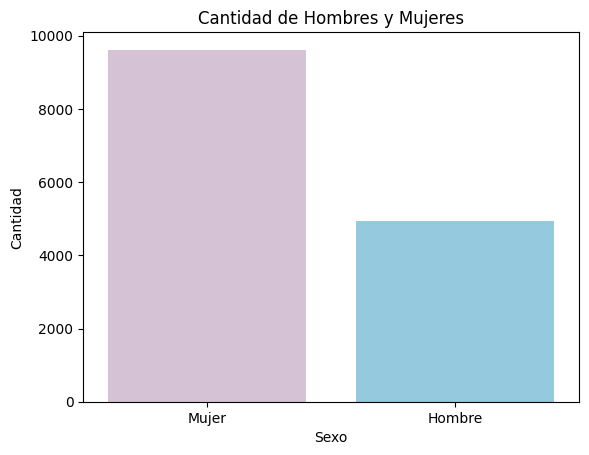

In [19]:
# Librerias
import seaborn as sns
import matplotlib.pyplot as plt

# Preparamos los datos
df_sexo = df["Sexo"].map({0: "Hombre", 1: "Mujer"}).value_counts().reset_index()
df_sexo.columns = ["Sexo", "Cantidad"]

# Gráfico
sns.barplot(data=df_sexo, x="Sexo", y="Cantidad", hue="Sexo", palette=["thistle", "skyblue"], legend=False)
plt.title("Cantidad de Hombres y Mujeres")
plt.ylabel("Cantidad")
plt.xlabel("Sexo")
plt.show()

### **CANTIDAD GRD**

In [20]:
# Calcular cuántos GRD distintos existen en el dataset
df["GRD"].nunique()

526

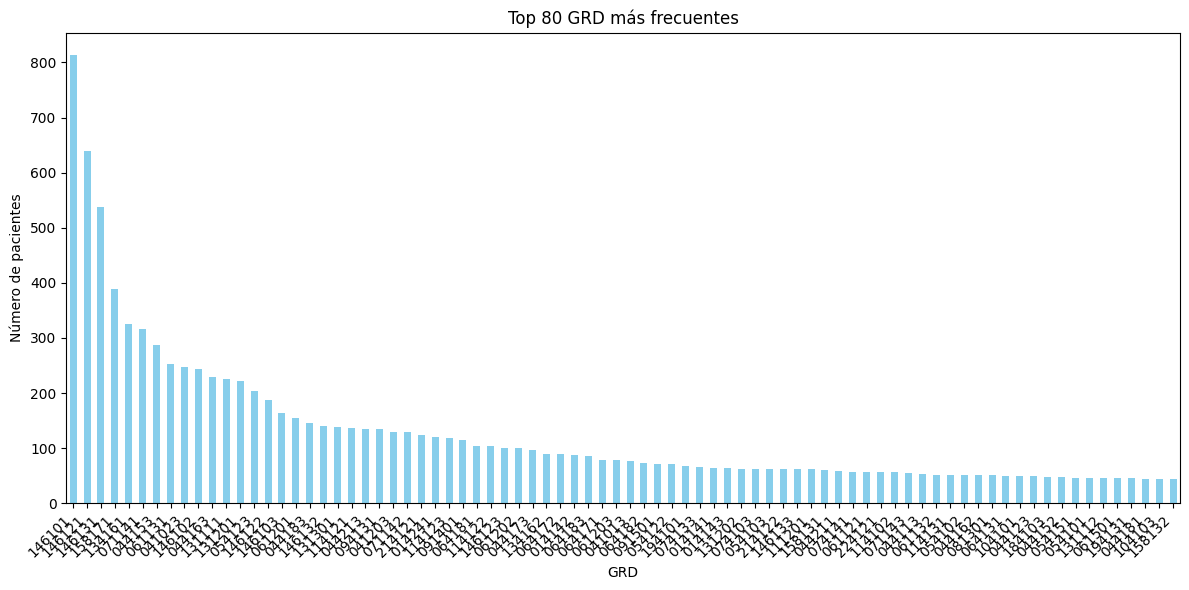

In [21]:
# Ver los GRD más frecuentes
grd = df["GRD"].value_counts().sort_values(ascending=False).head(80)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
grd.plot(kind='bar', color='skyblue')

# Etiquetas y título
plt.title("Top 80 GRD más frecuentes")
plt.xlabel("GRD")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

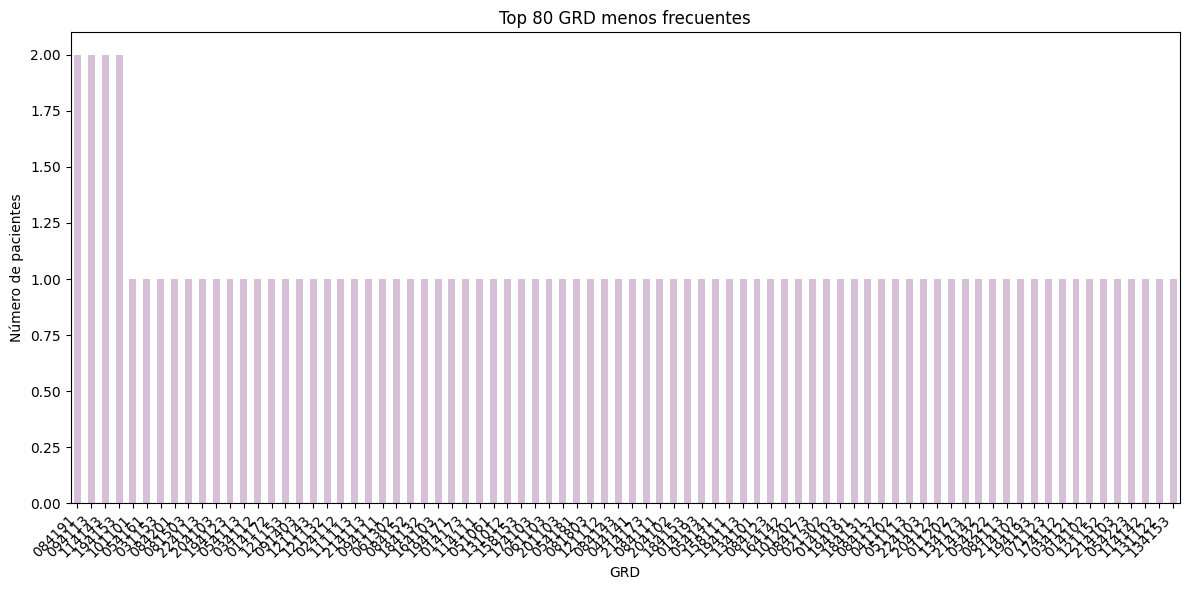

In [22]:
# Ver los GRD menos frecuentes
grd= df["GRD"].value_counts().sort_values(ascending=False).tail(80)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
grd.plot(kind='bar', color='thistle')

# Etiquetas y título
plt.title("Top 80 GRD menos frecuentes")
plt.xlabel("GRD")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

## **DICCIONARIOS**

### **Diagnosticos**

In [23]:
# Cargamos el archivo Excel con los diagnósticos CIE-10
diagnosticos_df = pd.read_excel("CIE-10.xlsx")

# Creamos un diccionario que relacione código base (ej: A00) con solo el nombre de la categoría
diccionario_diagnosticos = {}

# Recorremos cada fila del DataFrame
for _, fila in diagnosticos_df.iterrows():
    codigo = fila["Código"]
    categoria = fila["Categoría"]

    if isinstance(codigo, str) and len(codigo) >= 3:
        codigo_base = codigo[:3]  # Ej: A00

        # Removemos el código del inicio de la categoría y limpiamos espacios
        if isinstance(categoria, str):
            nombre_categoria = categoria.replace(codigo_base, "").strip()
        else:
            nombre_categoria = ""

        # Si el código base no está aún en el diccionario, lo agregamos con su categoría limpia
        if codigo_base not in diccionario_diagnosticos:
            diccionario_diagnosticos[codigo_base] = nombre_categoria

# Mostramos los primeros 10 códigos base de diagnóstico y su categoría
list(diccionario_diagnosticos.items())[:10]

[('A00', 'CÓLERA'),
 ('A01', 'FIEBRES TIFOIDEA Y PARATIFOIDEA'),
 ('A02', 'OTRAS INFECCIONES DEBIDAS A SALMONELLA'),
 ('A03', 'SHIGELOSIS'),
 ('A04', 'OTRAS INFECCIONES INTESTINALES BACTERIANAS'),
 ('A05',
  'OTRAS INTOXICACIONES ALIMENTARIAS BACTERIANAS, NO CLASIFICADAS EN OTRA PARTE'),
 ('A06', 'AMEBIASIS'),
 ('A07', 'OTRAS ENFERMEDADES INTESTINALES DEBIDAS A PROTOZOARIOS'),
 ('A08',
  'INFECCIONES INTESTINALES DEBIDAS A VIRUS Y OTROS ORGANISMOS ESPECIFICADOS'),
 ('A09',
  'OTRAS GASTROENTERITIS Y COLITIS DE ORIGEN INFECCIOSO Y NO ESPECIFICADO')]

In [24]:
# DataFrame binario con las categorías CIE-10 por paciente
# Obtenemos las columnas que contienen diagnósticos (Diag01 al Diag35)
columnas_diagnostico = [col for col in df.columns if col.startswith("Diag")]

# Creamos una lista  para guardar las categorías de cada paciente
categorias_paciente = []

# Recorremos cada fila
for _, fila in df[columnas_diagnostico].iterrows():
    paciente = set()  # Usamos set para evitar duplicados

    for diag in fila:
        if isinstance(diag, str) and diag.strip() != "":
            cod = diag[:3]  # Tomamos los primeros 3 caracteres del código
            if cod in diccionario_diagnosticos:
                paciente.add(cod)

    categorias_paciente.append(paciente)

# Obtener todas las categorías distintas encontradas
categorias_finales = sorted(set.union(*categorias_paciente))

# Creamo un DataFrame binario con 0s
df_binarioCategorias = pd.DataFrame(0, index=range(len(df)), columns=categorias_finales)

# Rellenamos con 1 donde el paciente tiene esa categoría
for i, cat in enumerate(categorias_paciente):
    for c in cat:
        df_binarioCategorias.at[i, c] = 1

# Mostramos las primeras filas
df_binarioCategorias.head()

,A02,A04,A05,A06,A08,A09,A15,A16,A18,A19,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Procedimientos**

In [25]:
# Cargamos el archivo Excel con los procedimientos CIE-9
procedimientos_df = pd.read_excel("CIE-9.xlsx")

# Creamos un diccionario que relacione código base (ej: 01) con solo el nombre de la categoría
diccionario_procedimientos = {}

# Recorremos cada fila del DataFrame
for _, fila in procedimientos_df.iterrows():
    codigo = fila["Código"]
    categoria = fila["Categoría"]

    if isinstance(codigo, (str, float)):
        codigo_str = str(codigo).strip()

        # Tomamos solo la parte entera del código antes del punto (ej: 86.28 → "86")
        if "." in codigo_str:
            codigo_base = codigo_str.split(".")[0].zfill(2)
        else:
            codigo_base = codigo_str.zfill(2)

        # Limpiamos la categoría: quitamos el código base del inicio, si lo tiene
        if isinstance(categoria, str):
            nombre_categoria = categoria.replace(codigo_base, "").strip()
        else:
            nombre_categoria = ""

        # Si el código base no está aún en el diccionario, lo agregamos con su categoría limpia
        if codigo_base not in diccionario_procedimientos:
            diccionario_procedimientos[codigo_base] = nombre_categoria

# Mostramos los primeros 10 códigos base de diagnóstico y su categoría
list(diccionario_procedimientos.items())[:10]

[('00',
  'PROCEDIMIENTOS E INTERVENCIONES, NO CLASIFICADOS BAJO OTROS  CONCEPTOS'),
 ('01', 'INCISION Y EXCISION DE CRANEO,CEREBRO Y MENINGES CEREBRALES'),
 ('02', 'OTRAS OPERACIONES EN CRANEO,CEREBRO Y MENINGES CEREBRALES'),
 ('03', 'OPERACIONES SOBRE MEDULA ESPINAL Y ESTRUCTURAS DE C. ESPINAL'),
 ('04', 'OPERACIONES SOBRE NERVIOS CRANEALES Y PERIFERICOS'),
 ('05', 'OPERACIONES SOBRE NERVIOS O GANGLIOS SIMPATICOS'),
 ('06', 'OPERACIONES SOBRE GANDULAS TIROIDES Y PARATIROIDES'),
 ('07', 'OPERACIONES SOBRE OTRAS GLANDULAS ENDOCRINAS'),
 ('08', 'OPERACIONES SOBRE PARPADOS'),
 ('09', 'OPERACIONES SOBRE APARATO LAGRIMAL')]

In [26]:
# DataFrame binario con las categorías CIE-9 por paciente
# Obtenemos las columnas que contienen los procedimientos (Proc01 al Proc30)
columnas_procedimiento = [col for col in df.columns if col.startswith("Proc")]

# Creamos una lista para guardar las categorías de cada paciente
categorias_paciente = []

# Recorremos cada fila del DataFrame (cada paciente)
for _, fila in df[columnas_procedimiento].iterrows():
    paciente = set()  # Usamos set para evitar duplicados

    for proc in fila:
        if isinstance(proc, str) and proc.strip() != "":
            # Tomamos la parte antes del punto (ej: 86.28 → 86) y rellenamos con 2 dígitos
            if "." in proc:
                cod = proc.split(".")[0].zfill(2)
            else:
                cod = proc.zfill(2)

            if cod in diccionario_procedimientos:
                paciente.add(cod)

    categorias_paciente.append(paciente)

# Obtenemos todas las categorías distintas encontradas
categorias_finales = sorted(set.union(*categorias_paciente))

# Creamos un DataFrame binario con 0s
df_binarioProcedimiento = pd.DataFrame(0, index=range(len(df)), columns=categorias_finales)

# Rellenamos con 1 donde el paciente tiene esa categoría
for i, cat in enumerate(categorias_paciente):
    for c in cat:
        df_binarioProcedimiento.at[i, c] = 1

# Mostramos las primeras filas
df_binarioProcedimiento.head()

,00,01,03,04,06,07,08,12,16,17,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,1


### **DATAFRAME FINAL**

In [27]:
# Construimos el dataFrame final para entrenamiento
# Unimos todas las variables de entrada: diagnósticos, procedimientos, edad y sexo
X = pd.concat([df_binarioCategorias, df_binarioProcedimiento, df[["Edad", "Sexo"]]], axis=1)

# Definimos la variable objetivo que es lo que queremos predecir
y = df["GRD"]

# Mostramos las primeras filas de X
X.head()

,A02,A04,A05,A06,A08,A09,A15,A16,A18,A19,...,92,93,94,95,96,97,98,99,Edad,Sexo
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,40,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,53,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,65,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,61,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,30,0


## **BALANCEO DE DATOS**

## **TODOS LOS GRD MAYOR A 100 CON 100 DATOS DE CADA UNO**

In [28]:
# Filtramos los GRD que tienen al menos 100 pacientes
grd100_pacientes = y.value_counts()[y.value_counts() >= 100].index

X_balanceado100 = []
y_balanceado100 = []

# Tomamos exactamente 100 pacientes aleatorios por cada GRD con suficientes casos
for grd in grd100_pacientes:
    muestras_X = X[y == grd].sample(n=100, random_state=42)
    muestras_y = y[y == grd].loc[muestras_X.index]
    X_balanceado100.append(muestras_X)
    y_balanceado100.append(muestras_y)

# Unimos todos los grupos en un solo dataset balanceado
X_balanceado100 = pd.concat(X_balanceado100).reset_index(drop=True)
y_balanceado100 = pd.concat(y_balanceado100).reset_index(drop=True)

# Mostramos un resumen del balanceo
print("Dataset balanceado creado con 100 muestras por GRD:")
print("Distribución de clases:\n", y_balanceado100.value_counts())

Dataset balanceado creado con 100 muestras por GRD:
Distribución de clases:
 GRD
146101    100
146121    100
146131    100
158171    100
134161    100
071141    100
044153    100
061131    100
041023    100
146102    100
044163    100
131111    100
131201    100
054123    100
146122    100
146103    100
061201    100
044183    100
146132    100
131301    100
114121    100
044213    100
094131    100
041203    100
071142    100
214121    100
014241    100
114123    100
091401    100
064181    100
114122    100
146123    100
061202    100
Name: count, dtype: int64


In [29]:
# Ver el dataframe balanceado
df_final = X_balanceado100.copy()
df_final["GRD"] = y_balanceado100
df_final.head()

,A02,A04,A05,A06,A08,A09,A15,A16,A18,A19,...,93,94,95,96,97,98,99,Edad,Sexo,GRD
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,34,1,146101
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,28,1,146101
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,39,1,146101
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,36,1,146101
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,30,1,146101


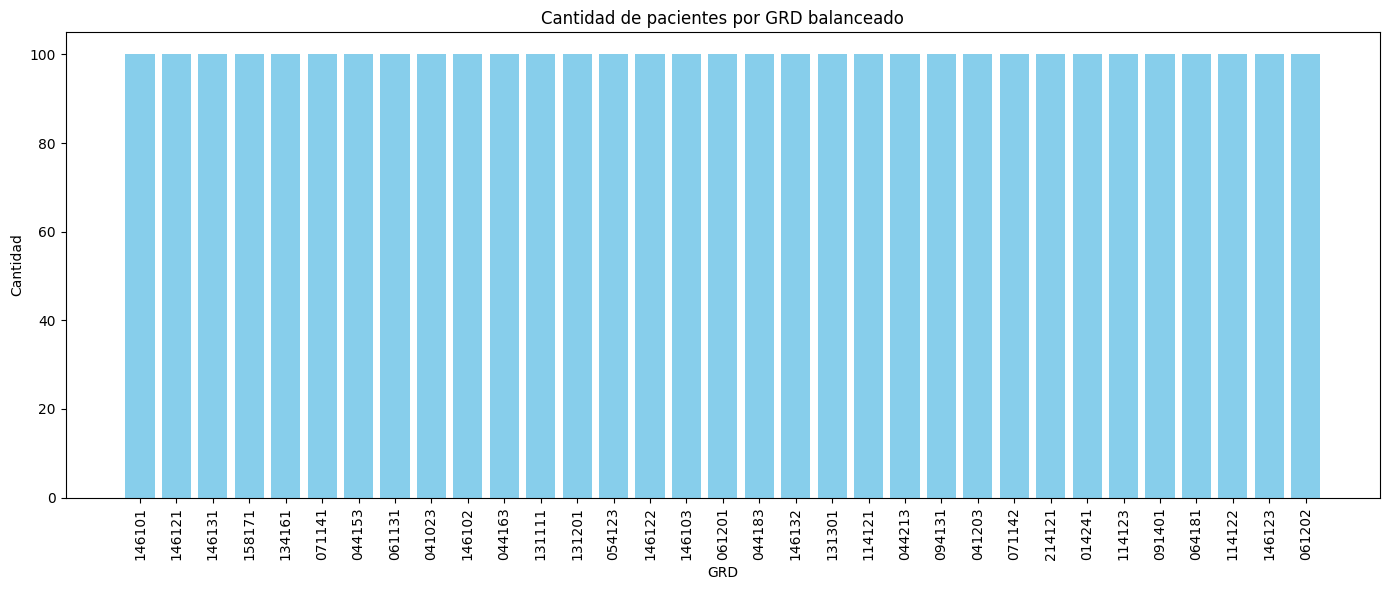

In [30]:
# Ver como quedaron los datos GDR
# Contamos GRD
conteoGRD = df_final["GRD"].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(14, 6))
plt.bar(conteoGRD.index.astype(str), conteoGRD.values, color='skyblue')
plt.title("Cantidad de pacientes por GRD balanceado")
plt.xlabel("GRD")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **ENTRENAMIENTO DEL MODELO**

In [32]:
# Librerías
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Codificar etiquetas GRD a números
encoder = LabelEncoder()
grd_num = encoder.fit_transform(y_balanceado100)

# Convertir a one-hot
grd_oh = to_categorical(grd_num)

# División de datos para redes neuronales (one-hot)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanceado100, grd_oh,
    test_size=0.2,
    stratify=grd_num,
    random_state=42
)

# División para modelos tipo Random Forest (etiquetas numéricas)
_, _, y_train_num, y_test_num = train_test_split(
    X_balanceado100, grd_num,
    test_size=0.2,
    stratify=grd_num,
    random_state=42
)

### **REDES NEURONALES**

In [33]:
# Librerías
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

# Definimos el modelo secuencial
modelo = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

# Compilamos el modelo
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'] # Métrica para evaluar el rendimiento
)

# Entrenamos el modelo con los datos de entrenamiento y validamos con el 20% de prueba
historial = modelo.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20, # Número de veces que pasa por todo el dataset
    batch_size=32 # Número de pacientes que procesa en cada paso
)

# Evaluamos el modelo final en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f"Exactitud en test: {accuracy:.4f}")  # Mostramos qué tan bien funcionó

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0642 - loss: 3.6520 - val_accuracy: 0.3000 - val_loss: 2.8550
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2429 - loss: 2.6981 - val_accuracy: 0.5742 - val_loss: 1.8657
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4308 - loss: 1.8574 - val_accuracy: 0.6606 - val_loss: 1.1354
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6172 - loss: 1.1947 - val_accuracy: 0.7197 - val_loss: 0.8220
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7004 - loss: 0.8574 - val_accuracy: 0.7682 - val_loss: 0.6940
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7586 - loss: 0.6573 - val_accuracy: 0.7909 - val_loss: 0.5716
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8033 - loss: 0.5340 - val_accuracy: 0.7924 - val_loss: 0.5313
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8336 - loss: 0.4718 - val_accuracy: 0.8242 - val_l

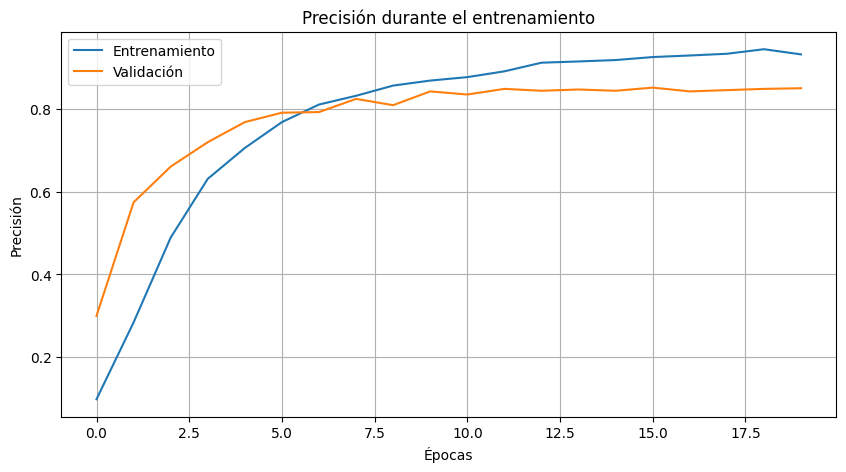

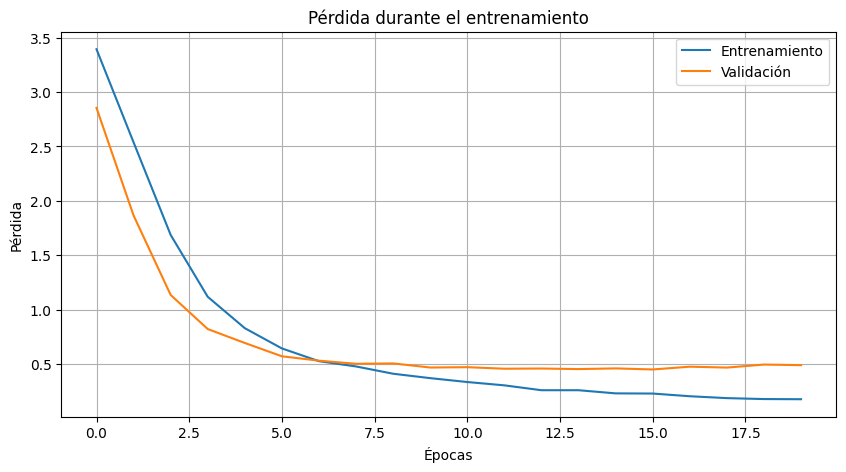

In [34]:
# Gráfico de precisión (accuracy)
plt.figure(figsize=(10, 5))
plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de pérdida (loss)
plt.figure(figsize=(10, 5))
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


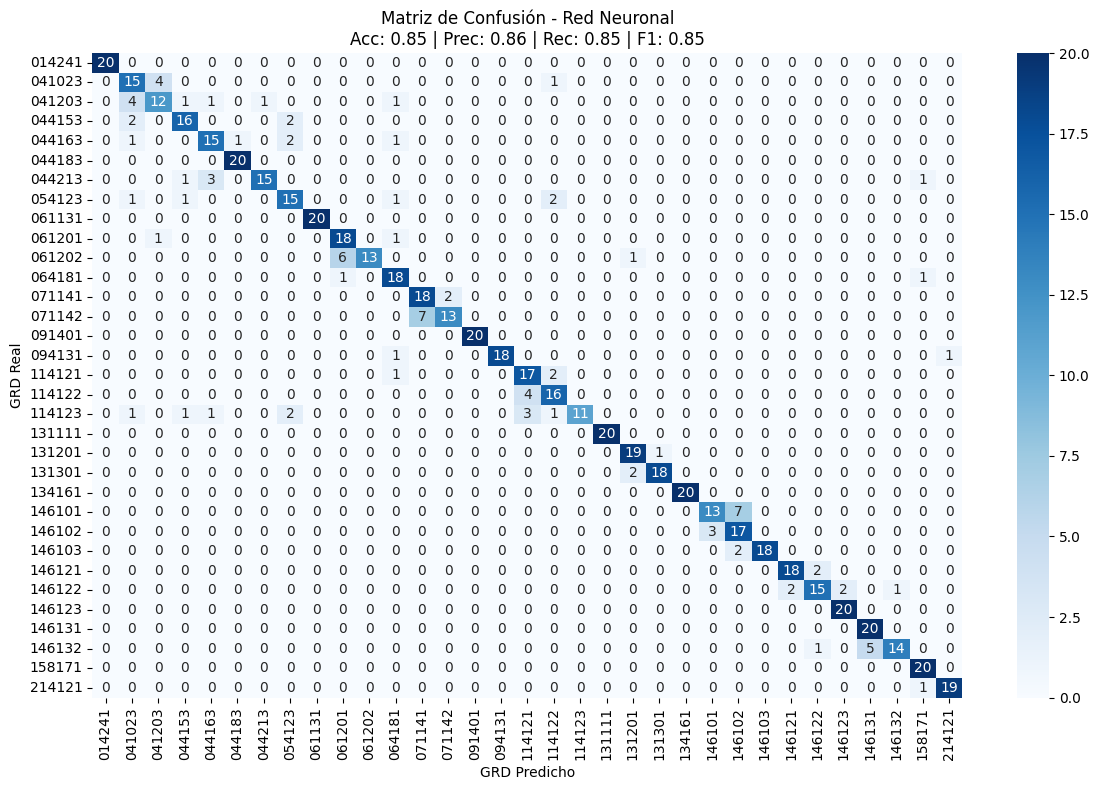

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predicciones
y_probs = modelo.predict(X_test)
y_pred = np.argmax(y_probs, axis=1)
y_real = np.argmax(y_test, axis=1)

# Métricas
acc = accuracy_score(y_real, y_pred)
prec = precision_score(y_real, y_pred, average='macro', zero_division=0)
rec = recall_score(y_real, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_real, y_pred, average='macro', zero_division=0)

# Matriz de confusión
mat = confusion_matrix(y_real, y_pred)

# Gráfico
plt.figure(figsize=(12, 8))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("GRD Predicho")
plt.ylabel("GRD Real")
plt.title(f"Matriz de Confusión - Red Neuronal\n"
          f"Acc: {acc:.2f} | Prec: {prec:.2f} | Rec: {rec:.2f} | F1: {f1:.2f}")
plt.tight_layout()
plt.show()

### **RANDOM FOREST**

In [38]:
# Libreria
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest
modelo_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    min_samples_leaf=8
)

# Entrenamiento
modelo_rf.fit(X_train, y_train_num)

# Predicción
y_pred_rf = modelo_rf.predict(X_test)

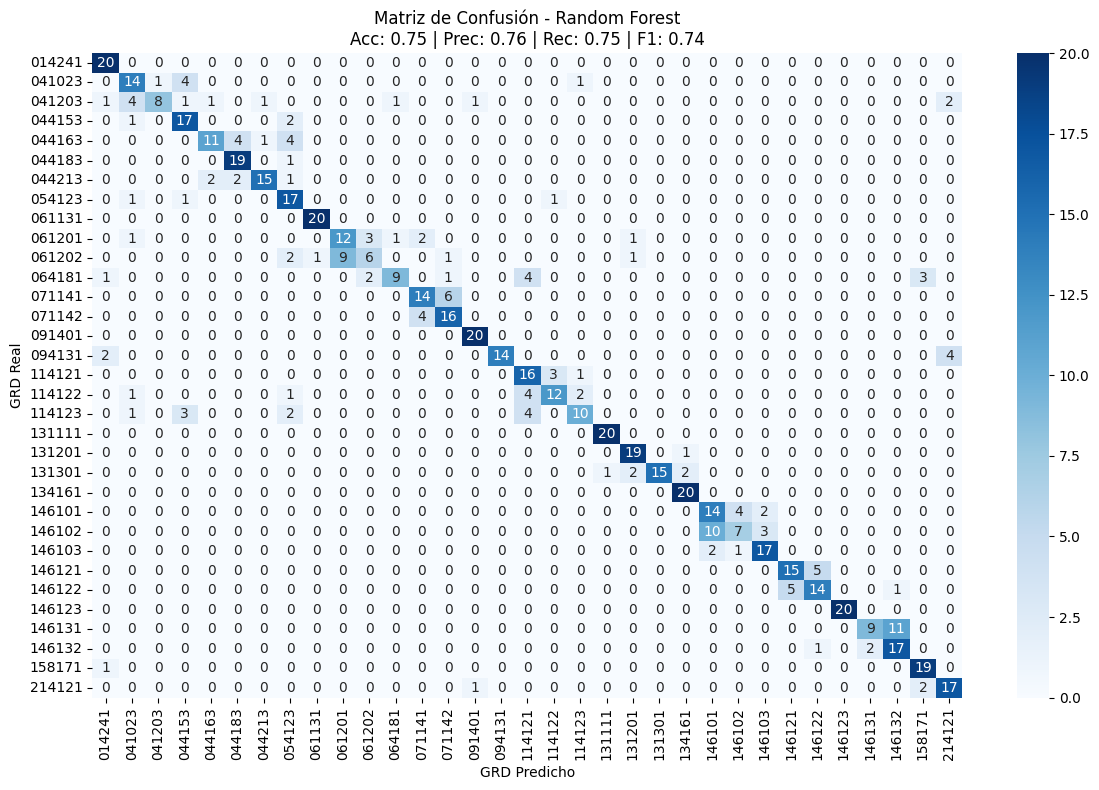

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Métricas
acc = accuracy_score(y_test_num, y_pred_rf)
prec = precision_score(y_test_num, y_pred_rf, average='macro', zero_division=0)
rec = recall_score(y_test_num, y_pred_rf, average='macro', zero_division=0)
f1 = f1_score(y_test_num, y_pred_rf, average='macro', zero_division=0)

# Matriz de confusión
mat = confusion_matrix(y_test_num, y_pred_rf)

# Gráfico
plt.figure(figsize=(12, 8))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("GRD Predicho")
plt.ylabel("GRD Real")
plt.title(f"Matriz de Confusión - Random Forest\n"
          f"Acc: {acc:.2f} | Prec: {prec:.2f} | Rec: {rec:.2f} | F1: {f1:.2f}")
plt.tight_layout()
plt.show()

### **XGBCLASSIFIER**

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo XGBoost
modelo_xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(encoder.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Entrenamiento
modelo_xgb.fit(X_train, y_train_num)

# Predicción
y_pred_xgb = modelo_xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:41:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


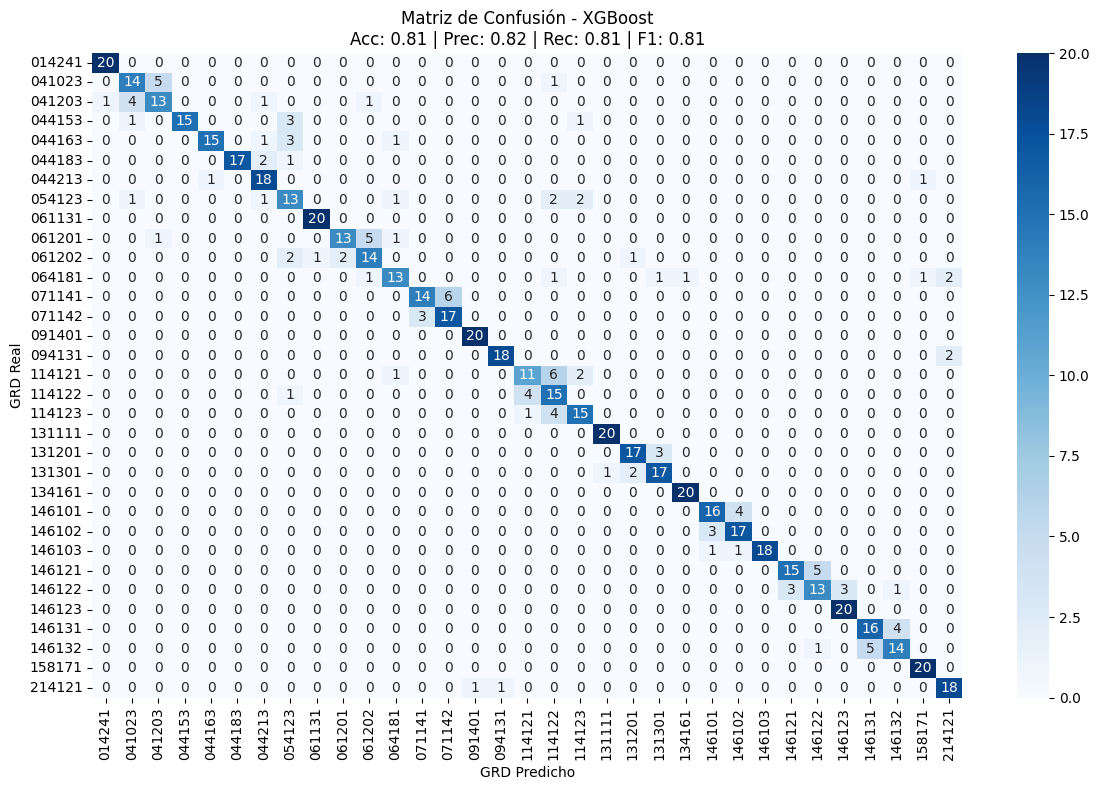

In [43]:
# Métricas
acc = accuracy_score(y_test_num, y_pred_xgb)
prec = precision_score(y_test_num, y_pred_xgb, average='macro', zero_division=0)
rec = recall_score(y_test_num, y_pred_xgb, average='macro', zero_division=0)
f1 = f1_score(y_test_num, y_pred_xgb, average='macro', zero_division=0)

# Matriz de confusión
mat = confusion_matrix(y_test_num, y_pred_xgb)

# Gráfico
plt.figure(figsize=(12, 8))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("GRD Predicho")
plt.ylabel("GRD Real")
plt.title(f"Matriz de Confusión - XGBoost\n"
          f"Acc: {acc:.2f} | Prec: {prec:.2f} | Rec: {rec:.2f} | F1: {f1:.2f}")
plt.tight_layout()
plt.show()

## **TODOS LOS GRD MAYOR A 100 CON SUS DATOS ORIGINALES**

In [44]:
# Filtrar los GRD que tienen al menos 100 pacientes
grd_frecuentes = y.value_counts()[y.value_counts() >= 100].index

# Filtrar el dataset completo para incluir solo esos GRD frecuentes
X_frecuente = X[y.isin(grd_frecuentes)]
y_frecuente = y[y.isin(grd_frecuentes)]

# Resetear los índices para que coincidan bien
X_frecuente = X_frecuente.reset_index(drop=True)
y_frecuente = y_frecuente.reset_index(drop=True)

# 4. Mostrar resumen
print("Dataset con GRD frecuentes sin balancear creado:")
print("Cantidad por clase:\n", y_frecuente.value_counts())

Dataset con GRD frecuentes sin balancear creado:
Cantidad por clase:
 GRD
146101    813
146121    639
146131    538
158171    389
134161    325
071141    317
044153    287
061131    252
041023    248
146102    244
044163    229
131111    226
131201    222
054123    204
146122    187
146103    163
061201    154
044183    145
146132    140
131301    139
114121    136
044213    135
094131    134
041203    130
071142    129
214121    123
014241    121
114123    118
091401    115
064181    104
114122    103
146123    101
061202    100
Name: count, dtype: int64


In [45]:
df_final = X_frecuente.copy()
df_final["GRD"] = y_frecuente
df_final.head()

,A02,A04,A05,A06,A08,A09,A15,A16,A18,A19,...,93,94,95,96,97,98,99,Edad,Sexo,GRD
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,61,0,041023
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,30,0,041023
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,0,1,37,1,041023
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,1,59,0,041023
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,77,1,041023


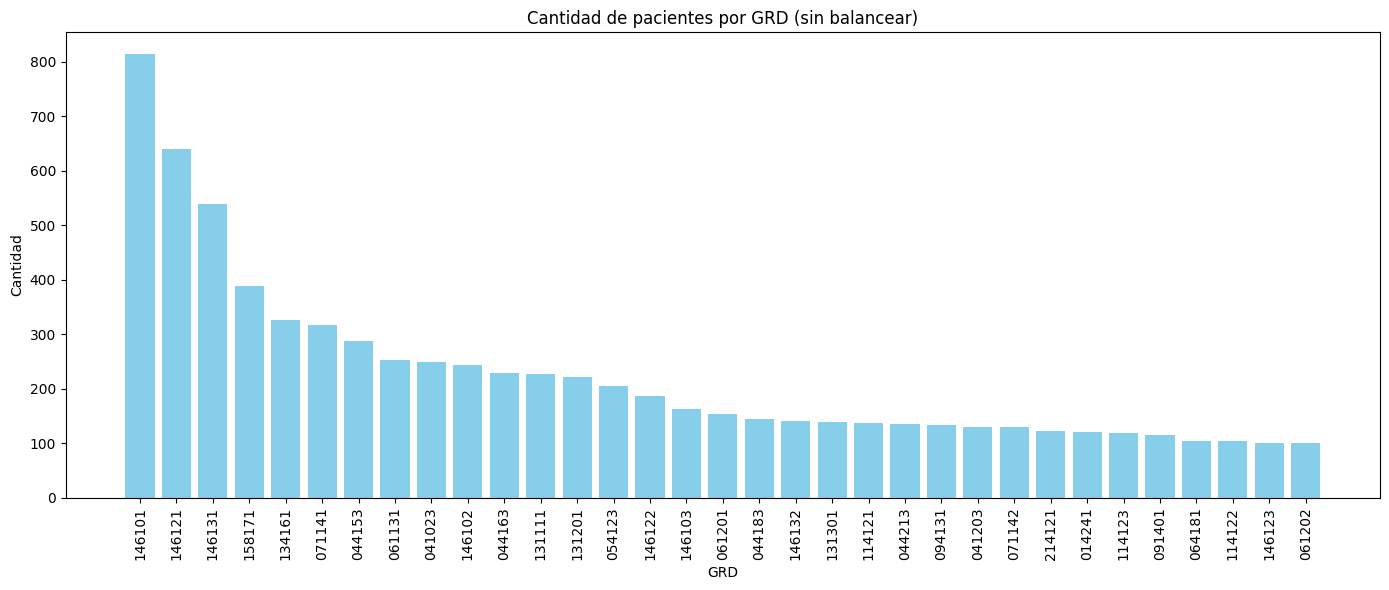

In [46]:
# Contamos GRD
conteoGRD = df_final["GRD"].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(14, 6))
plt.bar(conteoGRD.index.astype(str), conteoGRD.values, color='skyblue')
plt.title("Cantidad de pacientes por GRD (sin balancear)")
plt.xlabel("GRD")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **ENTRENAMIENTO DEL MODELO**

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Codificamos los GRD
encoder = LabelEncoder()
grd_num = encoder.fit_transform(y_frecuente)

# Convertimos a one-hot para red neuronal
grd_oh = to_categorical(grd_num)

# División única de los datos
X_train, X_test, y_train, y_test = train_test_split(
    X_frecuente, grd_oh,
    test_size=0.2,
    stratify=grd_num,
    random_state=42
)

# División paralela con etiquetas numéricas
_, _, y_train_num, y_test_num = train_test_split(
    X_frecuente, grd_num,
    test_size=0.2,
    stratify=grd_num,
    random_state=42
)

### **REDES NEURONALES**

In [50]:
# Librerías
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

# Modelo secuencial
modelo = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Una neurona por clase GRD
])

# Compilamos el modelo (definimos cómo aprende)
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'] # Métrica para evaluar el rendimiento
)

# Entrenamos el modelo con los datos de entrenamiento y validamos con el 20% de prueba
historial = modelo.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20, # Número de veces que pasa por todo el dataset
    batch_size=32 # Número de pacientes que procesa en cada paso
)

# Evaluamos el modelo final en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f"Exactitud en test: {accuracy:.4f}")  # Mostramos qué tan bien funcionó

Epoch 1/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2250 - loss: 3.0606 - val_accuracy: 0.6154 - val_loss: 1.4610
Epoch 2/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6189 - loss: 1.3402 - val_accuracy: 0.7740 - val_loss: 0.7322
Epoch 3/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7468 - loss: 0.7864 - val_accuracy: 0.8131 - val_loss: 0.5328
Epoch 4/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8232 - loss: 0.5234 - val_accuracy: 0.8462 - val_loss: 0.4430
Epoch 5/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8485 - loss: 0.4359 - val_accuracy: 0.8637 - val_loss: 0.4255
Epoch 6/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8673 - loss: 0.3751 - val_accuracy: 0.8765 - val_loss: 0.4072
Epoch 7/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8862 - loss: 0.3367 - val_accuracy: 0.8752 - val_loss: 0.4022
Epoch 8/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8965 - loss: 0.2953 - val_accuracy: 0

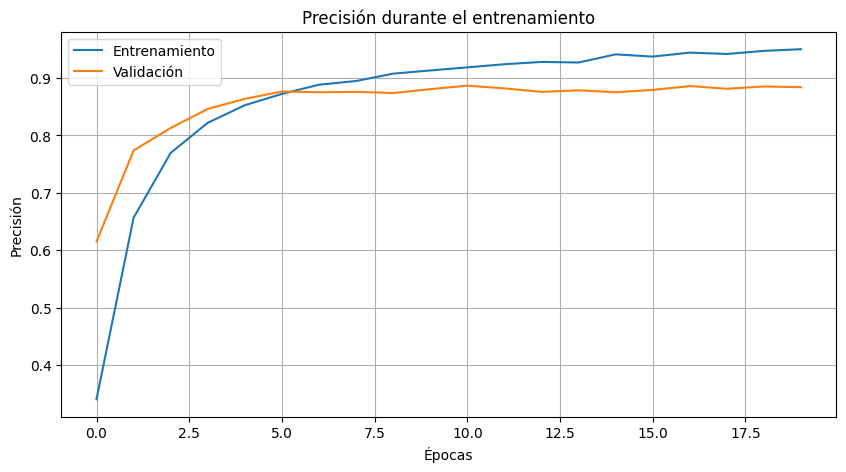

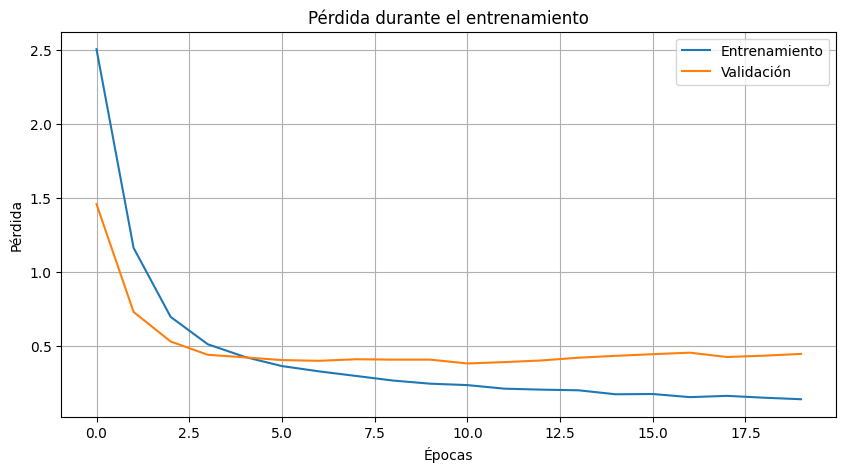

In [51]:
# Gráfico de precisión (accuracy)
plt.figure(figsize=(10, 5))
plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de pérdida (loss)
plt.figure(figsize=(10, 5))
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


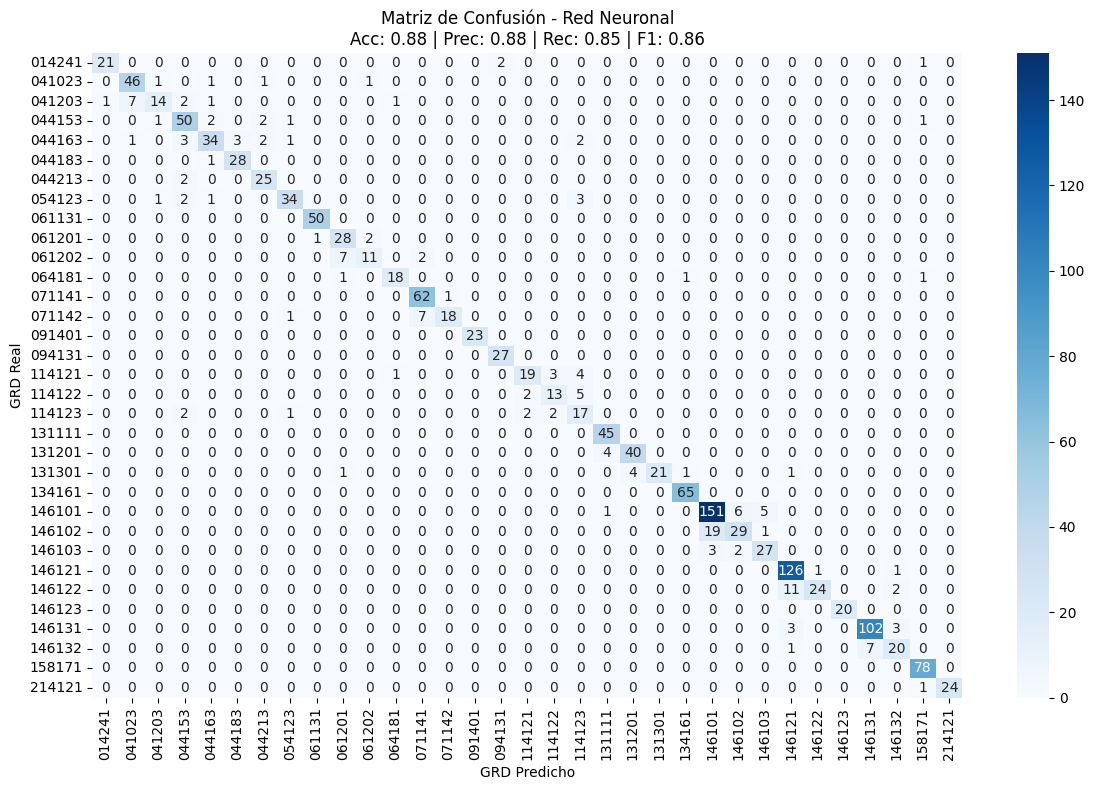

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predicciones
y_prob = modelo.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_real = np.argmax(y_test, axis=1)

# Métricas
acc = accuracy_score(y_real, y_pred)
prec = precision_score(y_real, y_pred, average='macro', zero_division=0)
rec = recall_score(y_real, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_real, y_pred, average='macro', zero_division=0)

# Matriz de confusión
mat = confusion_matrix(y_real, y_pred)

# Visualización
plt.figure(figsize=(12, 8))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("GRD Predicho")
plt.ylabel("GRD Real")
plt.title(f"Matriz de Confusión - Red Neuronal\n"
          f"Acc: {acc:.2f} | Prec: {prec:.2f} | Rec: {rec:.2f} | F1: {f1:.2f}")
plt.tight_layout()
plt.show()

### **RANDOM FOREST**

In [53]:
# Librerias
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest
modelo_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    min_samples_leaf=8
)

# Entrenamiento
modelo_rf.fit(X_train, y_train_num)

# Predicción
y_pred_rf = modelo_rf.predict(X_test)

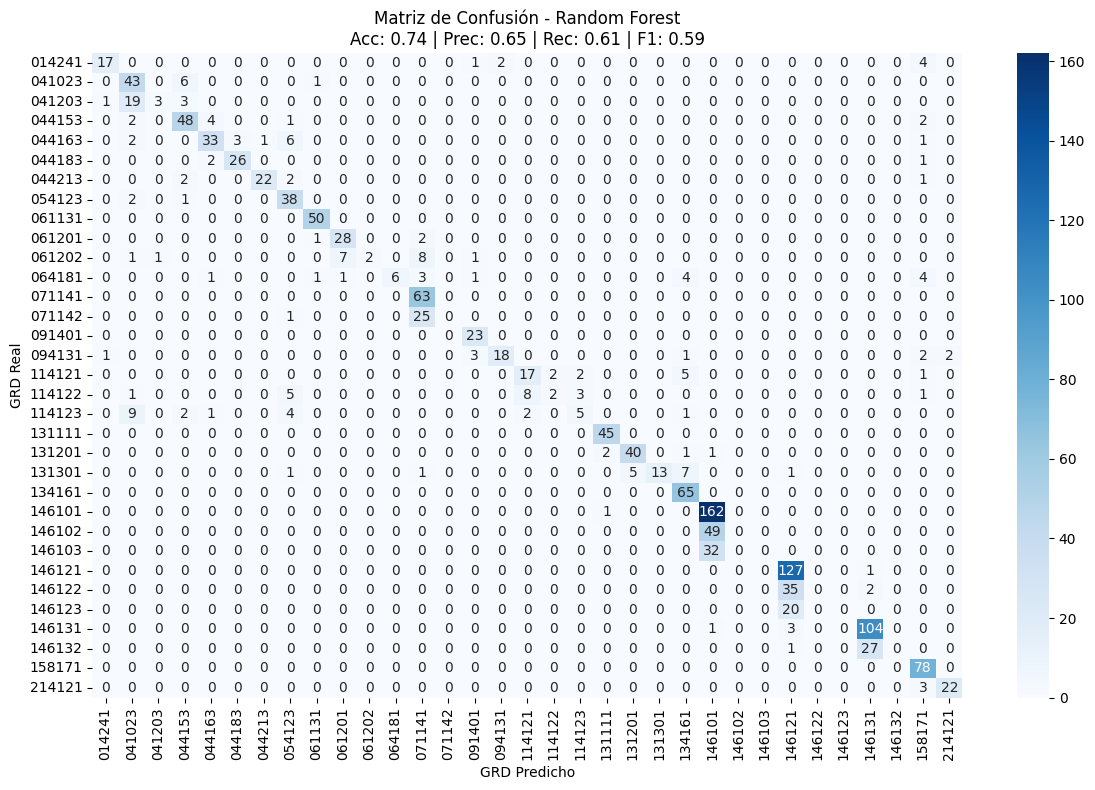

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Métricas
acc = accuracy_score(y_test_num, y_pred_rf)
prec = precision_score(y_test_num, y_pred_rf, average='macro', zero_division=0)
rec = recall_score(y_test_num, y_pred_rf, average='macro', zero_division=0)
f1 = f1_score(y_test_num, y_pred_rf, average='macro', zero_division=0)

# Matriz de confusión
mat = confusion_matrix(y_test_num, y_pred_rf)

# Visualización
plt.figure(figsize=(12, 8))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("GRD Predicho")
plt.ylabel("GRD Real")
plt.title(f"Matriz de Confusión - Random Forest\n"
          f"Acc: {acc:.2f} | Prec: {prec:.2f} | Rec: {rec:.2f} | F1: {f1:.2f}")
plt.tight_layout()
plt.show()

### **XGBCLASSIFIER**

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo XGBoost
modelo_xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(encoder.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Entrenamiento
modelo_xgb.fit(X_train, y_train_num)

# Predicción
y_pred_xgb = modelo_xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:54:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


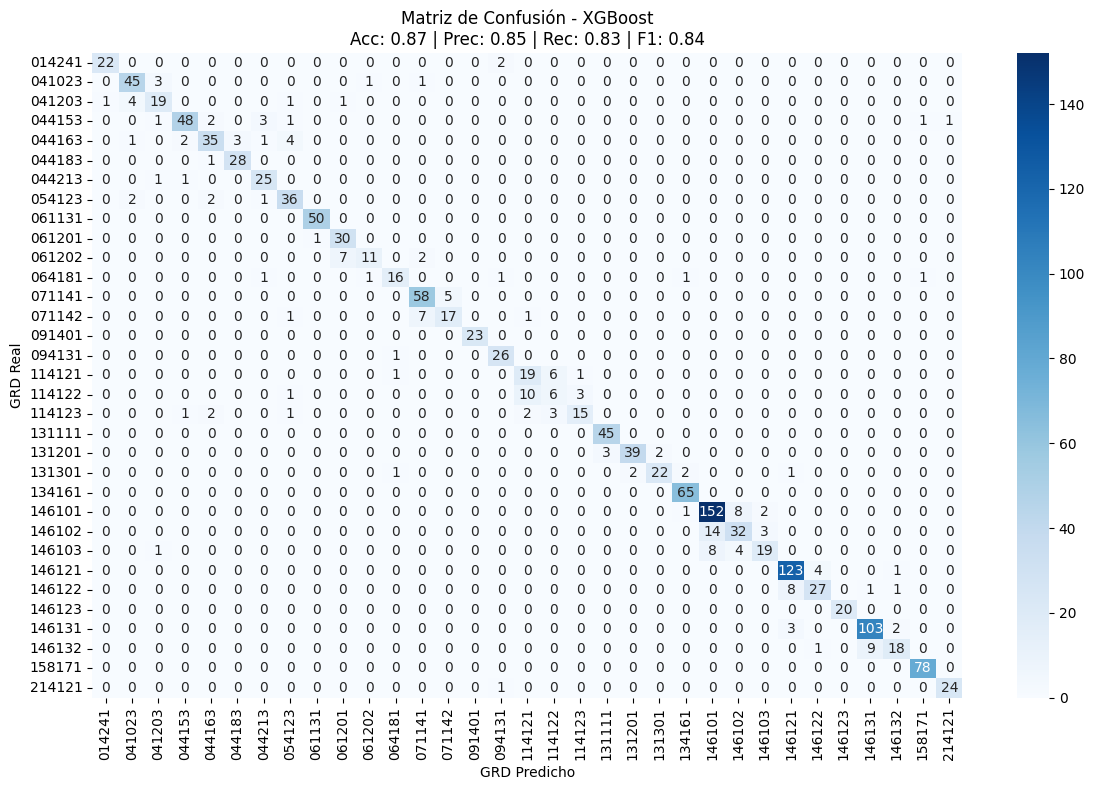

In [57]:
# Métricas
acc = accuracy_score(y_test_num, y_pred_xgb)
prec = precision_score(y_test_num, y_pred_xgb, average='macro', zero_division=0)
rec = recall_score(y_test_num, y_pred_xgb, average='macro', zero_division=0)
f1 = f1_score(y_test_num, y_pred_xgb, average='macro', zero_division=0)

# Matriz de confusión
mat = confusion_matrix(y_test_num, y_pred_xgb)

# Visualización
plt.figure(figsize=(12, 8))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("GRD Predicho")
plt.ylabel("GRD Real")
plt.title(f"Matriz de Confusión - XGBoost\n"
          f"Acc: {acc:.2f} | Prec: {prec:.2f} | Rec: {rec:.2f} | F1: {f1:.2f}")
plt.tight_layout()
plt.show()

## **TODOS LOS GRD (SIN BALANCEAR)**

In [58]:
# Usar todos los datos sin filtrar ni balancear
X_completo = X.reset_index(drop=True)
y_completo = y.reset_index(drop=True)

# Mostrar resumen de la cantidad por clase
print("Dataset completo sin balancear creado:")
print("Cantidad por GRD:\n", y_completo.value_counts())

Dataset completo sin balancear creado:
Cantidad por GRD:
 GRD
146101    813
146121    639
146131    538
158171    389
134161    325
         ... 
214103      1
054223      1
114142      1
131122      1
134153      1
Name: count, Length: 526, dtype: int64


In [59]:
df_final = X_completo.copy()
df_final["GRD"] = y_completo
df_final.head()

,A02,A04,A05,A06,A08,A09,A15,A16,A18,A19,...,93,94,95,96,97,98,99,Edad,Sexo,GRD
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,40,0,184103
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,53,0,041013
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,65,0,041013
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,61,0,041023
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,30,0,041023


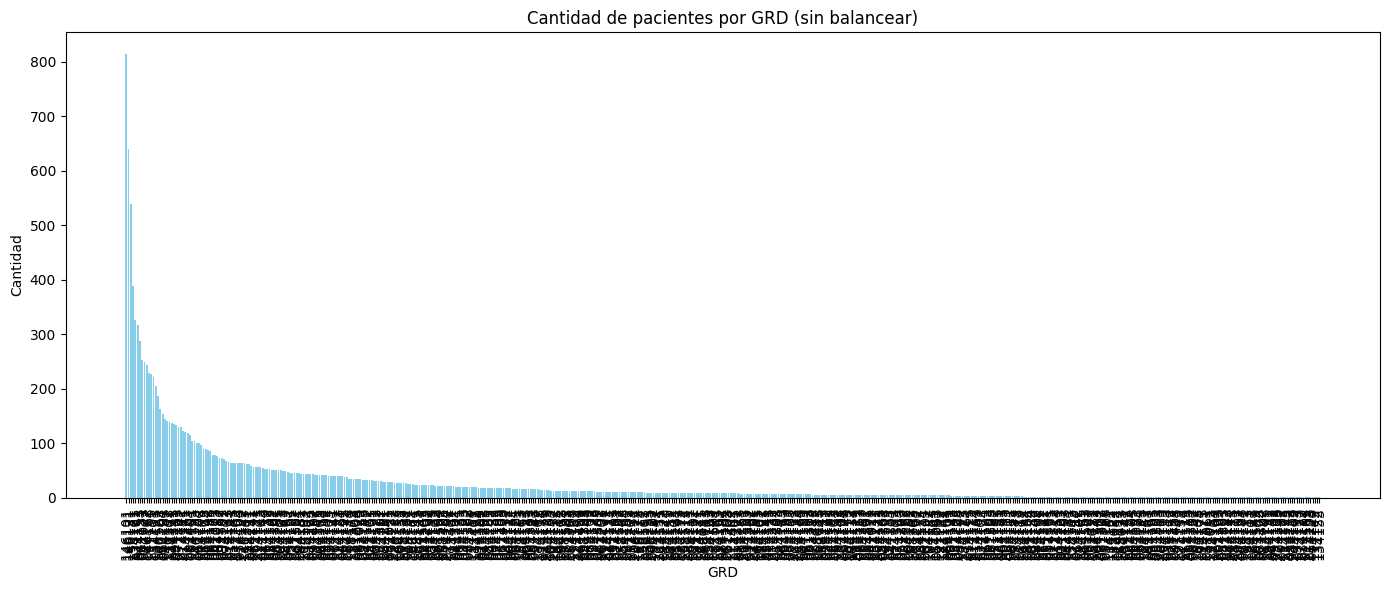

In [60]:
# Contamos GRD
conteoGRD = df_final["GRD"].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(14, 6))
plt.bar(conteoGRD.index.astype(str), conteoGRD.values, color='skyblue')
plt.title("Cantidad de pacientes por GRD (sin balancear)")
plt.xlabel("GRD")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **ENTRENAMIENTO DEL MODELO**

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

# 1. Unimos X e y para filtrar
df_temp = X.copy()
df_temp["GRD"] = y

# 2. Filtrar GRD con al menos 2 registros
grd_validos = df_temp["GRD"].value_counts()[df_temp["GRD"].value_counts() >= 2].index
df_filtrado = df_temp[df_temp["GRD"].isin(grd_validos)]

# 3. Separar X e y nuevamente
X_completo = df_filtrado.drop(columns="GRD").reset_index(drop=True)
y_completo = df_filtrado["GRD"].reset_index(drop=True)

# 4. Codificar GRD
encoder = LabelEncoder()
grd_num = encoder.fit_transform(y_completo)
grd_oh = to_categorical(grd_num)

# 5. División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_completo, grd_oh,
    test_size=0.2,
    stratify=grd_num,
    random_state=42
)

# También versión numérica para otros modelos
_, _, y_train_num, y_test_num = train_test_split(
    X_completo, grd_num,
    test_size=0.2,
    stratify=grd_num,
    random_state=42
)

### **REDES NEURONALES**

In [62]:
# Librerias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

# Definimos el modelo
modelo = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

# Compilación
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento
historial = modelo.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

loss, accuracy = modelo.evaluate(X_test, y_test)
print(f"Exactitud en test: {accuracy:.4f}")

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1226 - loss: 5.0875 - val_accuracy: 0.3497 - val_loss: 3.4011
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3410 - loss: 3.2987 - val_accuracy: 0.4484 - val_loss: 2.6361
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4385 - loss: 2.5759 - val_accuracy: 0.5257 - val_loss: 2.1416
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5053 - loss: 2.1104 - val_accuracy: 0.5633 - val_loss: 1.8764
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5484 - loss: 1.8380 - val_accuracy: 0.5896 - val_loss: 1.7131
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5871 - loss: 1.6063 - val_accuracy: 0.6061 - val_loss: 1.5843
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6176 - loss: 1.4082 - val_accuracy: 0.6120 - val_loss: 1.5409
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6542 - loss: 1.2558 - val_accuracy

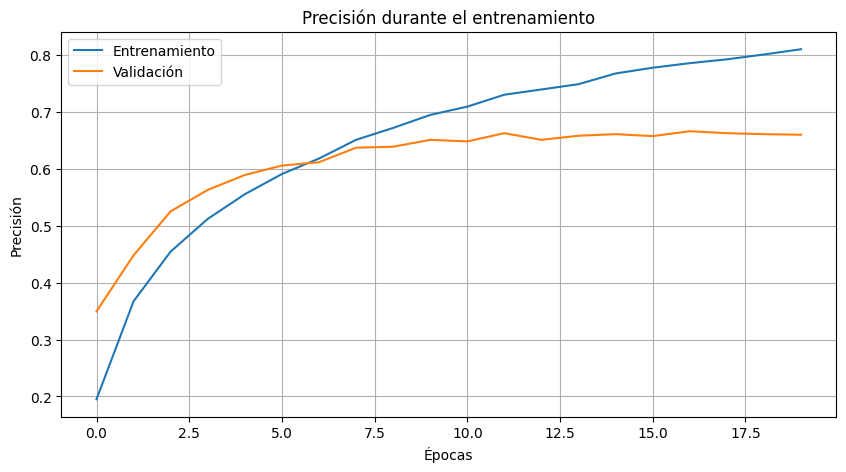

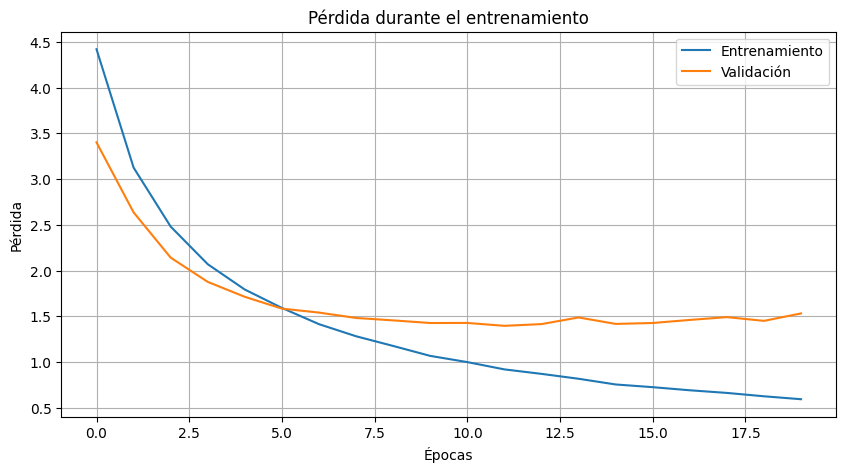

In [63]:
# Gráfico de precisión (accuracy)
plt.figure(figsize=(10, 5))
plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de pérdida (loss)
plt.figure(figsize=(10, 5))
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
# Predicciones
y_prob = modelo.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_real = np.argmax(y_test, axis=1)

# Métricas globales
acc = accuracy_score(y_real, y_pred)
prec = precision_score(y_real, y_pred, average='macro', zero_division=0)
rec = recall_score(y_real, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_real, y_pred, average='macro', zero_division=0)

# Mostrar resultados
print("Métricas globales:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Métricas globales:
Accuracy : 0.6603
Precision: 0.3590
Recall   : 0.3529
F1 Score : 0.3403


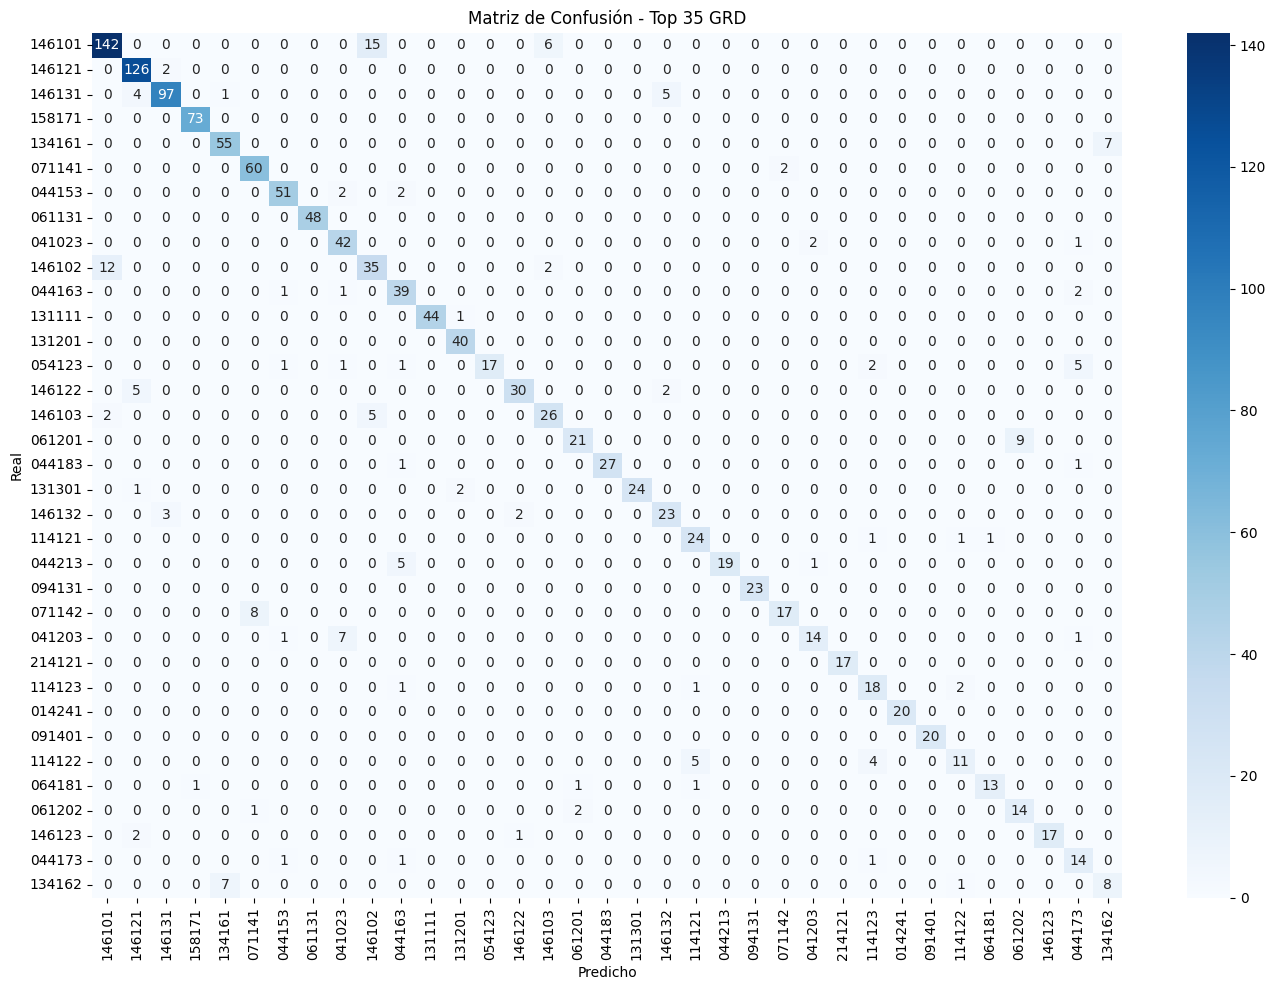

In [65]:
# Matriz de confusión completa
mat = confusion_matrix(y_real, y_pred)
clases = np.unique(np.concatenate([y_real, y_pred]))

# Top 35 GRD más frecuentes
freq = pd.Series(np.bincount(y_real))
top_35 = freq.sort_values(ascending=False).head(35).index
pos = [np.where(clases == i)[0][0] for i in top_35]

# Filtrar la matriz
mat_top = mat[np.ix_(pos, pos)]
labels = encoder.inverse_transform(clases[pos])

# Graficar
plt.figure(figsize=(14, 10))
sns.heatmap(mat_top, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Top 35 GRD")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    min_samples_leaf=8
)

rf_model.fit(X_train, y_train_rf)

# Predicción
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Métricas globales
acc = accuracy_score(y_test_rf, y_pred_rf)
prec = precision_score(y_test_rf, y_pred_rf, average='macro', zero_division=0)
rec = recall_score(y_test_rf, y_pred_rf, average='macro', zero_division=0)
f1 = f1_score(y_test_rf, y_pred_rf, average='macro', zero_division=0)

# Mostrar métricas
print("Métricas - Random Forest")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

Métricas - Random Forest
Accuracy : 0.4719
Precision: 0.1076
Recall   : 0.1186
F1 Score : 0.0973


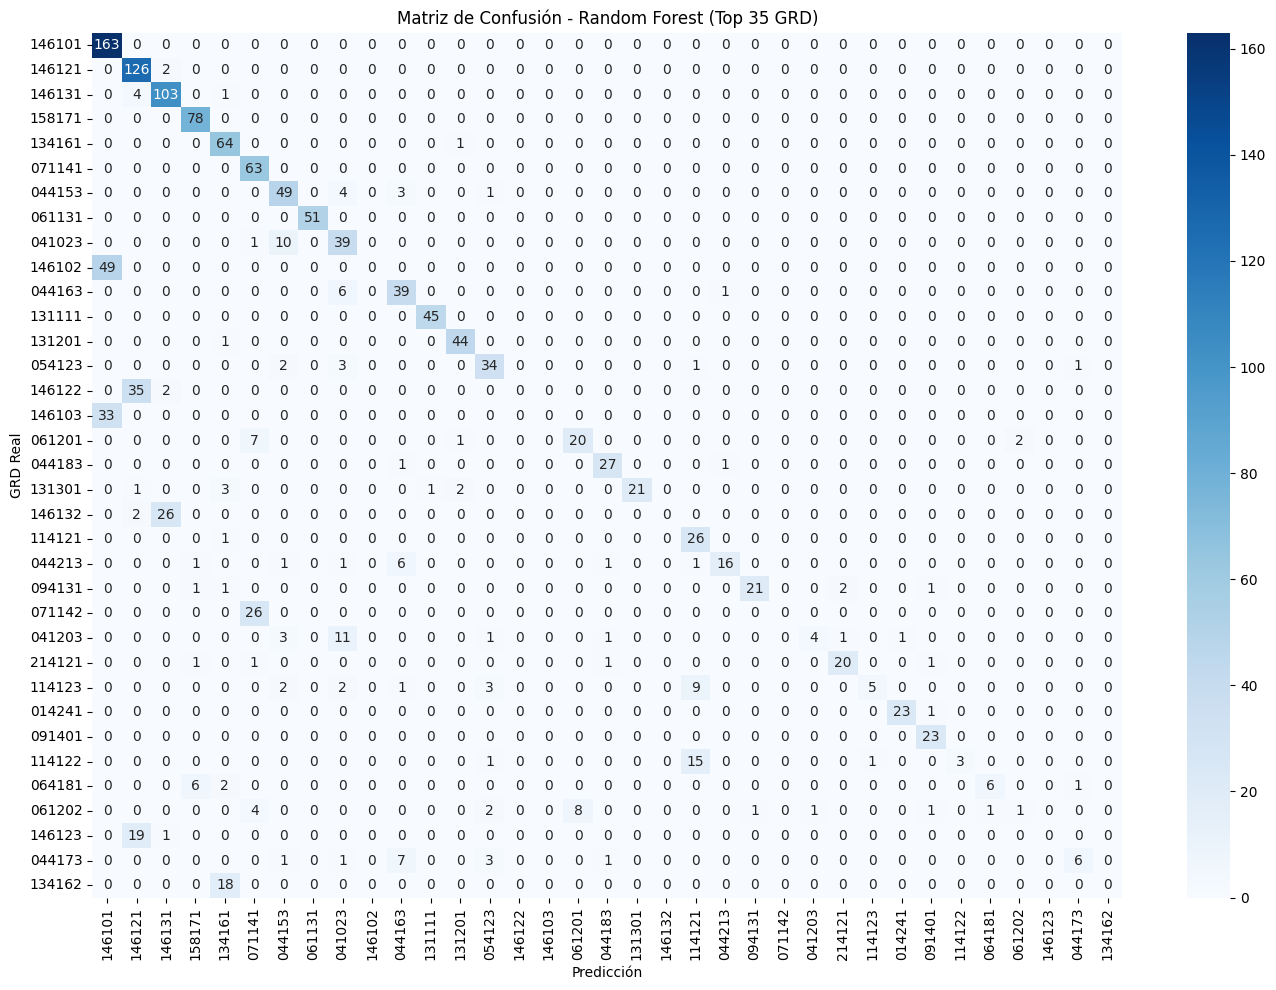

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Matriz completa
matriz = confusion_matrix(y_test_rf, y_pred_rf)
clases = np.unique(np.concatenate([y_test_rf, y_pred_rf]))

# Top 35 más frecuentes en reales
frecuencias = pd.Series(np.bincount(y_test_rf))
top_35 = frecuencias.sort_values(ascending=False).head(35).index
pos = [np.where(clases == i)[0][0] for i in top_35]

# Filtrar matriz y etiquetas
matriz_top = matriz[np.ix_(pos, pos)]
etiquetas = le.inverse_transform(clases[pos])

# Graficar
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_top, annot=True, fmt="d", cmap="Blues",
            xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel("Predicción")
plt.ylabel("GRD Real")
plt.title("Matriz de Confusión - Random Forest (Top 35 GRD)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **XGBCLASSIFIER**

In [66]:
# Librerias
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear modelo
modelo_xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(encoder.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    max_depth=4,
    n_estimators=50,
    n_jobs=-1,
    verbosity=1
)

# 2. Entrenar
modelo_xgb.fit(X_train, y_train_num)

# 3. Predecir
y_pred = modelo_xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:06:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Métricas globales
acc = accuracy_score(y_test_num, y_pred)
prec = precision_score(y_test_num, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test_num, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test_num, y_pred, average='macro', zero_division=0)

# Mostrar métricas
print("Métricas - XGBoost")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

Métricas - XGBoost
Accuracy : 0.3062
Precision: 0.0278
Recall   : 0.0574
F1 Score : 0.0358


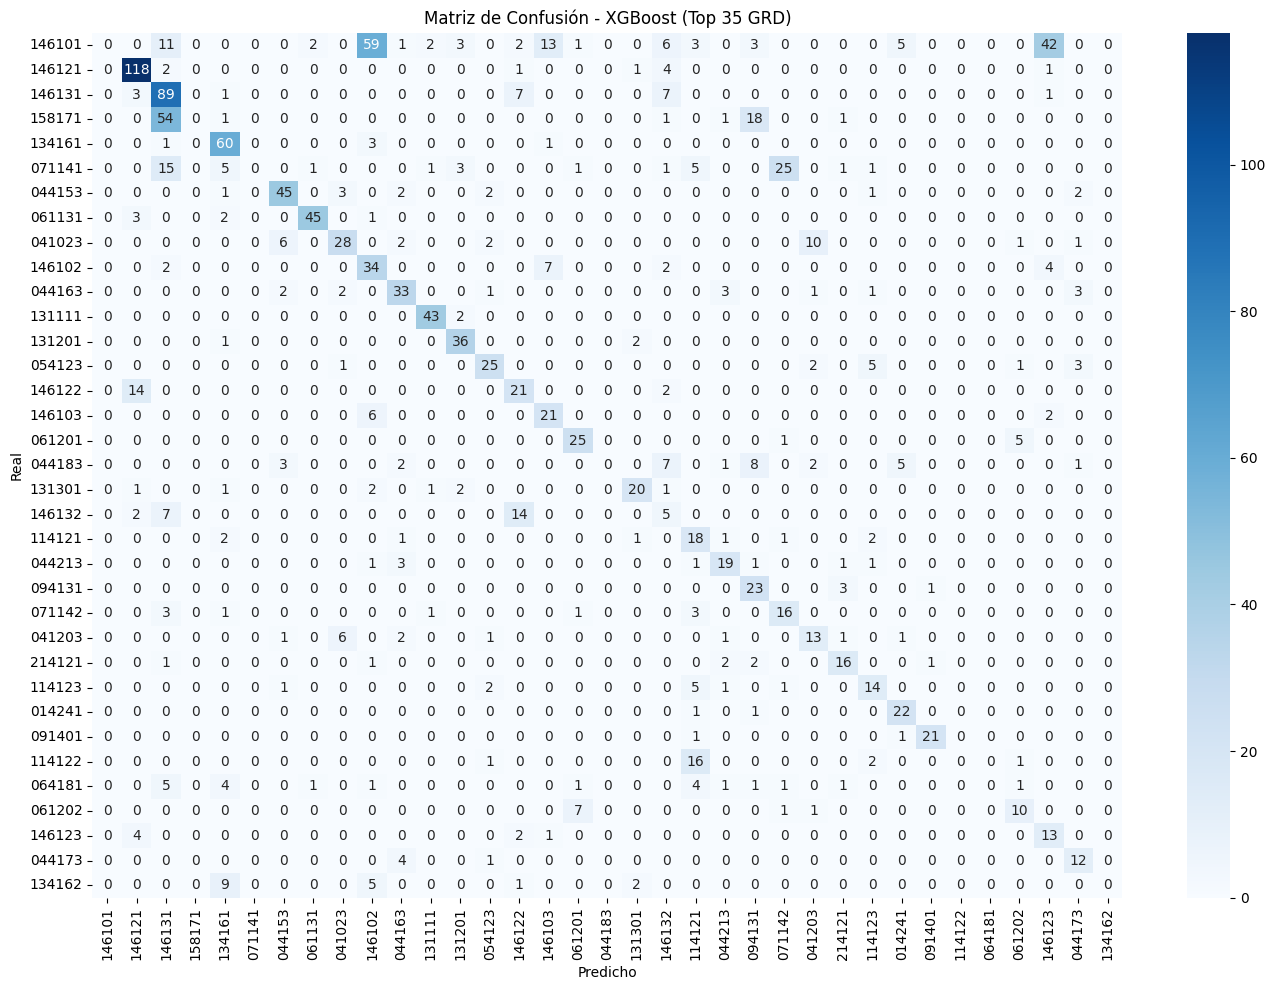

In [68]:
# Libreria
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Matriz de confusión completa
mat = confusion_matrix(y_test_num, y_pred)
clases = np.unique(np.concatenate([y_test_num, y_pred]))

# Top 35 GRD más frecuentes
freq = pd.Series(np.bincount(y_test_num))
top_35 = freq.sort_values(ascending=False).head(35).index
pos = [np.where(clases == i)[0][0] for i in top_35]

# Filtrar matriz y etiquetas
mat_top = mat[np.ix_(pos, pos)]
labels = encoder.inverse_transform(clases[pos])

# Graficar
plt.figure(figsize=(14, 10))
sns.heatmap(mat_top, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - XGBoost (Top 35 GRD)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()